In [1]:
import os

os.chdir('../../../')
print(os.getcwd())

from PIL import Image
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
import albumentations as A
from torchvision.transforms.functional import to_tensor
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from tictactoeDetect import fieldModel, boardModel

/home/robert/Documents/GitHub/OutSmarted/backend


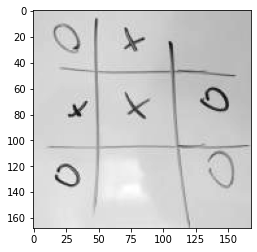

In [2]:
image = Image.open('../data/TicTacToe/boards/raw/0.jpg')
image = image.resize((168, 168))
image = image.convert('L')
plt.imshow(image, cmap='gray')
plt.show()

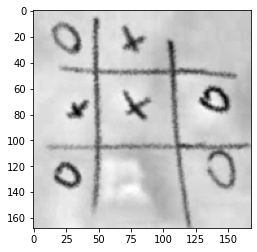

In [3]:
transform = A.Compose([
    A.InvertImg(p=0.18),
    A.ColorJitter(brightness=0.55, contrast=0.6, saturation=0.6, hue=0.6, p=0.4),
    A.GaussNoise(p=0.28),
    A.Blur(blur_limit=4, p=0.22),
    A.GlassBlur(max_delta=1, iterations=1, p=0.14),
    A.CLAHE(p=0.3),
    A.Sharpen(p=0.2),
    A.Emboss(p=0.18),
    A.Equalize(p=0.05),
    A.MultiplicativeNoise(p=0.22),
])

image1 = np.array(image)
image1 = transform(image=image1)['image']
image1 = Image.fromarray(image1)
fig, ax = plt.subplots(1)
ax.imshow(image1, cmap='gray')
plt.show()

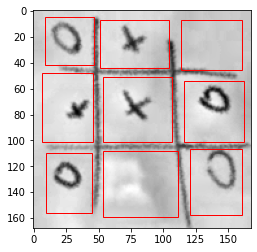

In [4]:
imageT = to_tensor(image1).reshape(1, 1, 168, 168)
out = boardModel(imageT).reshape(9, 4).cpu().detach().numpy()

fields = []

for box in out:
    x, y, w, h = box
    x, y, w, h = 168 * x, 168 * y, 168 * w, 168 * h
    im1 = image1.crop(
        (x - w / 2, y - h / 2, x + w / 2, y + h / 2)
    )
    im1 = im1.resize((28, 28))
    im1 = to_tensor(im1)
    fields.append(im1)
    rect = Rectangle(
        (x - w / 2, y - h / 2),
        w,
        h,
        linewidth=1,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

fields = torch.stack(fields)
out = fieldModel(fields)
state = out.argmax(1).numpy().reshape(3, 3) - 1
fig


In [5]:
print(state, "\n-1: O | 0: empty | 1: X")

[[-1  1  0]
 [ 1  1 -1]
 [-1  0 -1]] 
-1: O | 0: empty | 1: X
